In [6]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [34]:
df_train = pd.read_csv('/Users/mengjiatan/Desktop/credit/cs-training.csv')
df_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [35]:
#drop firt col & change column to lower case 
df_train = df_train.drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(df_train.columns)):
    cleancolumn.append(df_train.columns[i].lower())
df_train.columns = cleancolumn

In [37]:
df_train.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                       3924
dtype: int64

In [40]:
#drop NaN
df_train = df_train.dropna()
df_train.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime30-59dayspastduenotworse    0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime60-89dayspastduenotworse    0
numberofdependents                      0
dtype: int64

In [41]:
# Check for non-numeric values in each column of 'X'
non_numeric_columns = df_train.apply(pd.to_numeric, errors='coerce').isnull().any()

# Get the column names with non-numeric values
columns_with_non_numeric = non_numeric_columns[non_numeric_columns].index.tolist()

print(columns_with_non_numeric)
df_train

[]


,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [42]:
# Transform categorical cells into numeric values
'''
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = df_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

df_train.head()
'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel_encoder = LabelEncoder()\ncategorical_cols = df_train.select_dtypes(include=['object']).columns\nfor col in categorical_cols:\n    df_train[col] = label_encoder.fit_transform(df_train[col])\n\ndf_train.head()\n"

In [9]:
def load_data(file_path):
    # Load the data
    df_train = pd.read_csv(file_path)
    
    # For each column heading we replace "-" and convert the heading in lowercase 
    cleancolumn = []
    for i in range(len(df_train.columns)):
        cleancolumn.append(df_train.columns[i].lower())
    df_train.columns = cleancolumn
    
    # Drop NaN
    df_train = df_train.dropna()
    
    # Check for non-numeric values in each column of 'X'
    non_numeric_columns = df_train.apply(pd.to_numeric, errors='coerce').isnull().any()

    # Get the column names with non-numeric values
    columns_with_non_numeric = non_numeric_columns[non_numeric_columns].index.tolist()

    print('columns with non-numeric input:', columns_with_non_numeric)
    
    # Transform categorical cells into numeric values
    label_encoder = LabelEncoder()
    categorical_cols = df_train.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df_train[col] = label_encoder.fit_transform(df_train[col])
    
    return df_train

In [13]:
df_train = load_data('/Users/mengjiatan/Desktop/credit/cs-training.csv')

columns with non-numeric input: []


In [54]:
X = df_train.drop('seriousdlqin2yrs', axis=1)
y = df_train["seriousdlqin2yrs"]

In [55]:
X.shape,y.shape

((120269, 10), (120269,))

In [56]:
# distribution of the target feature 
total_len = len(y)
percentage_labels = (y.value_counts()/total_len)*100
percentage_labels

0    93.05141
1     6.94859
Name: seriousdlqin2yrs, dtype: float64

oversampling 
- it's important to note that oversampling should only be applied to the training data, not the validation or test data. 
- This is because oversampling can lead to overfitting if it's applied to the validation or test data.

In [57]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train.shape,X_test.shape

((96215, 10), (24054, 10))

In [59]:
#oversampling 
sm = RandomOverSampler(sampling_strategy = 0.3, random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [64]:
# Display the count of each class in the oversampled training data
y_res.value_counts()

0    89556
1    26866
Name: seriousdlqin2yrs, dtype: int64

In [67]:
y_res.shape, X_res.shape

((116422,), (116422, 10))

In [69]:
#concat X_res and y_res into new training data, which is the rescaled training dataset
dff = pd.concat([X_res, y_res], axis=1)
dff.shape

(116422, 11)

In [82]:
dff.to_csv('rescaled_data.csv',index = False)

In [18]:
#汇总成一个function
def check_unbalanced(X, y):
    # Distribution of the target feature 
    total_len = len(y)
    percentage_labels = (y.value_counts()/total_len)*100
    print('Distribution of the target feature :', percentage_labels)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print('X_train shape:',X_train.shape,'X_test shape:', X_test.shape)
    
    # Oversampling 
    sm = RandomOverSampler(sampling_strategy = 0.3, random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    
    # Display the count of each class in the oversampled training data
    print(y_res.value_counts())
    print('y_rescaled shape:',y_res.shape, 'X_rescaled shape:',X_res.shape)
    
    # Concat X_res and y_res into new training data, which is the rescaled training dataset
    dff = pd.concat([X_res, y_res], axis=1)
    print('rescaled training data shape:',dff.shape)
    
    return dff, X_test, y_test


In [21]:
#测试check_unbalanced function
X = df_train.drop('seriousdlqin2yrs', axis=1)
y = df_train["seriousdlqin2yrs"]
dff = check_unbalanced(X,y)[0]

Distribution of the target feature : 0    93.05141
1     6.94859
Name: seriousdlqin2yrs, dtype: float64
X_train shape: (96215, 11) X_test shape: (24054, 11)
0    89556
1    26866
Name: seriousdlqin2yrs, dtype: int64
y_rescaled shape: (116422,) X_rescaled shape: (116422, 11)
rescaled training data shape: (116422, 12)


# Data binning

target variable cannot be binned, The target variable should be a binary variable containing 0s and 1s, where 1 indicates 'Bad' (delinquency) and 0 indicates 'Good' (no delinquency).

In [110]:
# Define the target variable
target = 'seriousdlqin2yrs'

# Define the features
features = [col for col in dff.columns if col != target]

# Define the number of bins
num_bins = 10

# Initialize an empty dataframe to store the binned data
data_binned = pd.DataFrame()

# Bin the data
for feature in features:
    data_binned[feature] = pd.qcut(dff[feature], q=num_bins, duplicates='drop')

# Add the target variable to the binned data
data_binned[target] = dff[target]

# Display the first few rows of the dataframe
data_binned

,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents,seriousdlqin2yrs
0,"(0.0669, 0.137]","(54.0, 58.0]","(-0.001, 1.0]","(0.111, 0.18]","(11362.9, 3008750.0]","(15.0, 58.0]","(-0.001, 1.0]","(2.0, 54.0]","(-0.001, 98.0]","(2.0, 3.0]",0
1,"(0.252, 0.414]","(-0.001, 31.0]","(-0.001, 1.0]","(0.025, 0.111]","(2916.0, 3653.0]","(3.0, 4.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 98.0]","(-0.001, 1.0]",0
2,"(0.866, 1.0]","(37.0, 42.0]","(1.0, 98.0]","(0.304, 0.371]","(8881.0, 11362.9]","(4.0, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 98.0]","(-0.001, 1.0]",1
3,"(0.252, 0.414]","(54.0, 58.0]","(-0.001, 1.0]","(0.371, 0.451]","(7290.0, 8881.0]","(7.0, 8.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 98.0]","(-0.001, 1.0]",0
4,"(1.0, 50708.0]","(37.0, 42.0]","(-0.001, 1.0]","(0.18, 0.242]","(2916.0, 3653.0]","(-0.001, 3.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 98.0]","(1.0, 2.0]",0
...,...,...,...,...,...,...,...,...,...,...,...
116417,"(1.0, 50708.0]","(50.0, 54.0]","(1.0, 98.0]","(0.565, 0.803]","(11362.9, 3008750.0]","(9.0, 11.0]","(-0.001, 1.0]","(2.0, 54.0]","(-0.001, 98.0]","(-0.001, 1.0]",1
116418,"(0.0062, 0.0291]","(54.0, 58.0]","(-0.001, 1.0]","(0.111, 0.18]","(3653.0, 4409.0]","(-0.001, 3.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 98.0]","(3.0, 20.0]",1
116419,"(1.0, 50708.0]","(-0.001, 31.0]","(1.0, 98.0]","(0.304, 0.371]","(5200.0, 6100.0]","(12.0, 15.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 98.0]","(-0.001, 1.0]",1
116420,"(0.866, 1.0]","(54.0, 58.0]","(-0.001, 1.0]","(0.304, 0.371]","(5200.0, 6100.0]","(3.0, 4.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 98.0]","(1.0, 2.0]",1


In [23]:
#汇总成一个function
def data_bining(dff, target, num_bins=10):
    # Define the features
    features = [col for col in dff.columns if col != target]

    # Initialize an empty dataframe to store the binned data
    data_binned = pd.DataFrame()

    # Bin the data
    for feature in features:
        data_binned[feature] = pd.qcut(dff[feature], q=num_bins, duplicates='drop')

    # Add the target variable to the binned data
    data_binned[target] = dff[target]

    return data_binned

In [25]:
#测试dat_bining function
data_binned = data_bining(dff, 'seriousdlqin2yrs',10 )

In [74]:
#data_binned.to_csv('data_binned.csv', index = False)

# Feature selection

In [84]:
# Define a function to calculate WoE and IV
def calculate_woe_iv(df, feature):
    # Calculate the total number of good and bad outcomes
    total_good = df[target].sum()
    total_bad = df.shape[0] - total_good

    # Calculate the number of good and bad outcomes for each value of the feature
    df_feature = df.groupby(feature)[target].agg(['sum', 'count'])
    df_feature.columns = ['Good', 'All']
    df_feature['Bad'] = df_feature['All'] - df_feature['Good']

    # Calculate the proportion of good and bad outcomes for each value of the feature
    df_feature['Distribution Good'] = df_feature['Good'] / total_good
    df_feature['Distribution Bad'] = df_feature['Bad'] / total_bad

    # Calculate the Weight of Evidence (WoE) for each value of the feature
    df_feature['WoE'] = np.log(df_feature['Distribution Good'] / df_feature['Distribution Bad'])

    # Calculate the Information Value (IV) for the feature
    df_feature['IV'] = (df_feature['Distribution Good'] - df_feature['Distribution Bad']) * df_feature['WoE']

    # Reset the index
    df_feature.reset_index(inplace=True)

    # Rename the feature column to 'Value'
    df_feature.rename(columns={feature: 'Value'}, inplace=True)

    # Add the feature name to the dataframe
    df_feature['Variable'] = feature

    # Rearrange the columns
    df_feature = df_feature[['Variable', 'Value', 'All', 'Good', 'Bad', 'Distribution Good', 'Distribution Bad', 'WoE', 'IV']]

    return df_feature

In [85]:
# Initialize an empty dataframe to store the WoE and IV
df_woe_iv = pd.DataFrame(columns=['Variable', 'Value', 'All', 'Good', 'Bad', 'Distribution Good', 'Distribution Bad', 'WoE', 'IV'])

# Calculate the WoE and IV
for feature in features:
    # Convert the feature values to string type
    data_binned[feature] = data_binned[feature].astype(str)
    df_woe_iv = df_woe_iv.append(calculate_woe_iv(data_binned, feature))

# Sort the features by IV
df_woe_iv = df_woe_iv.sort_values(by='IV', ascending=False)

# Display the dataframe
df_woe_iv

/var/folders/k7/0dwl2knn34q4_hlbvrsbm2rr0000gn/T/ipykernel_29632/772922214.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_woe_iv = df_woe_iv.append(calculate_woe_iv(data_binned, feature))
/var/folders/k7/0dwl2knn34q4_hlbvrsbm2rr0000gn/T/ipykernel_29632/772922214.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_woe_iv = df_woe_iv.append(calculate_woe_iv(data_binned, feature))
/var/folders/k7/0dwl2knn34q4_hlbvrsbm2rr0000gn/T/ipykernel_29632/772922214.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_woe_iv = df_woe_iv.append(calculate_woe_iv(data_binned, feature))
/var/folders/k7/0dwl2knn34q4_hlbvrsbm2rr0000gn/T/ipykernel_29632/772922214.py:8: FutureWarning: The frame.append method is deprecated and will be

,Variable,Value,All,Good,Bad,Distribution Good,Distribution Bad,WoE,IV
1,numberoftimes90dayslate,"(1.0, 98.0]",5256,4404,852,0.163925,0.009514,2.846685,4.395596e-01
1,numberoftime30-59dayspastduenotworse,"(1.0, 98.0]",10668,6979,3689,0.259771,0.041192,1.841553,4.025241e-01
8,revolvingutilizationofunsecuredlines,"(0.866, 1.0]",18534,9071,9463,0.337639,0.105666,1.161696,2.694819e-01
9,revolvingutilizationofunsecuredlines,"(1.0, 50708.0]",4751,3342,1409,0.124395,0.015733,2.067692,2.246795e-01
1,revolvingutilizationofunsecuredlines,"(0.0062, 0.0291]",11642,668,10974,0.024864,0.122538,-1.594993,1.557889e-01
...,...,...,...,...,...,...,...,...,...
1,debtratio,"(0.025, 0.111]",11642,2714,8928,0.101020,0.099692,0.013234,1.757524e-05
6,monthlyincome,"(5200.0, 6100.0]",11482,2663,8819,0.099122,0.098475,0.006547,4.235311e-06
1,numberofopencreditlinesandloans,"(11.0, 12.0]",5773,1340,4433,0.049877,0.049500,0.007596,2.866699e-06
3,numberofopencreditlinesandloans,"(15.0, 58.0]",11542,2660,8882,0.099010,0.099178,-0.001698,2.857260e-07


In [89]:
# Sort the features by IV
df_woe_iv = df_woe_iv.sort_values(by='IV', ascending=False)
df_woe_iv[:20]

,Variable,Value,All,Good,Bad,Distribution Good,Distribution Bad,WoE,IV
1,numberoftimes90dayslate,"(1.0, 98.0]",5256,4404,852,0.163925,0.009514,2.846685,0.439560
1,numberoftime30-59dayspastduenotworse,"(1.0, 98.0]",10668,6979,3689,0.259771,0.041192,1.841553,0.402524
8,revolvingutilizationofunsecuredlines,"(0.866, 1.0]",18534,9071,9463,0.337639,0.105666,1.161696,0.269482
9,revolvingutilizationofunsecuredlines,"(1.0, 50708.0]",4751,3342,1409,0.124395,0.015733,2.067692,0.224679
1,revolvingutilizationofunsecuredlines,"(0.0062, 0.0291]",11642,668,10974,0.024864,0.122538,-1.594993,0.155789
2,revolvingutilizationofunsecuredlines,"(0.0291, 0.0669]",11642,828,10814,0.030820,0.120751,-1.365581,0.122809
3,revolvingutilizationofunsecuredlines,"(0.0669, 0.137]",11643,1035,10608,0.038525,0.118451,-1.123204,0.089774
0,revolvingutilizationofunsecuredlines,"(-0.001, 0.0062]",11643,1142,10501,0.042507,0.117256,-1.014687,0.075847
9,age,"(70.0, 103.0]",10567,1031,9536,0.038376,0.106481,-1.020542,0.069504
0,numberoftime30-59dayspastduenotworse,"(-0.001, 1.0]",105754,19887,85867,0.740229,0.958808,-0.258731,0.056553


the revolvingutilizationofunsecuredlines feature appears multiple times because it has different IV values for different binned brackets.

In [90]:
# Group by 'Variable' and calculate the sum of 'IV' for each variable
df_woe_iv_sum = df_woe_iv.groupby('Variable')['IV'].sum().reset_index()

# Sort the variables by 'IV'
df_woe_iv_sum = df_woe_iv_sum.sort_values(by='IV', ascending=False)

# Display the top 10 variables
df_woe_iv_sum.head(10)

,Variable,IV
9,revolvingutilizationofunsecuredlines,1.045381
7,numberoftimes90dayslate,0.465729
5,numberoftime30-59dayspastduenotworse,0.459077
0,age,0.195285
2,monthlyincome,0.080517
1,debtratio,0.069999
4,numberofopencreditlinesandloans,0.055694
3,numberofdependents,0.023525
8,numberrealestateloansorlines,0.016927
6,numberoftime60-89dayspastduenotworse,0.000000


In [33]:
#汇总成一个function，feature_select_woe_iv
def feature_select_woe_iv(data_binned, target, features):
    # Define a function to calculate WoE and IV
    def calculate_woe_iv(df, feature):
        # Calculate the total number of good and bad outcomes
        total_good = df[target].sum()
        total_bad = df.shape[0] - total_good

        # Calculate the number of good and bad outcomes for each value of the feature
        df_feature = df.groupby(feature)[target].agg(['sum', 'count'])
        df_feature.columns = ['Good', 'All']
        df_feature['Bad'] = df_feature['All'] - df_feature['Good']

        # Calculate the proportion of good and bad outcomes for each value of the feature
        df_feature['Distribution Good'] = df_feature['Good'] / total_good
        df_feature['Distribution Bad'] = df_feature['Bad'] / total_bad

        # Calculate the Weight of Evidence (WoE) for each value of the feature
        df_feature['WoE'] = np.log(df_feature['Distribution Good'] / df_feature['Distribution Bad'])

        # Calculate the Information Value (IV) for the feature
        df_feature['IV'] = (df_feature['Distribution Good'] - df_feature['Distribution Bad']) * df_feature['WoE']

        # Reset the index
        df_feature.reset_index(inplace=True)

        # Rename the feature column to 'Value'
        df_feature.rename(columns={feature: 'Value'}, inplace=True)

        # Add the feature name to the dataframe
        df_feature['Variable'] = feature

        # Rearrange the columns
        df_feature = df_feature[['Variable', 'Value', 'All', 'Good', 'Bad', 'Distribution Good', 'Distribution Bad', 'WoE', 'IV']]

        return df_feature

    # Initialize an empty dataframe to store the WoE and IV
    df_woe_iv = pd.DataFrame(columns=['Variable', 'Value', 'All', 'Good', 'Bad', 'Distribution Good', 'Distribution Bad', 'WoE', 'IV'])

    # Calculate the WoE and IV
    for feature in features:
        # Convert the feature values to string type
        data_binned[feature] = data_binned[feature].astype(str)
        df_woe_iv = df_woe_iv.append(calculate_woe_iv(data_binned, feature))

    # Sort the features by IV
    df_woe_iv = df_woe_iv.sort_values(by='IV', ascending=False)

    # Group by 'Variable' and calculate the sum of 'IV' for each variable
    df_woe_iv_sum = df_woe_iv.groupby('Variable')['IV'].sum().reset_index()

    # Sort the variables by 'IV'
    df_woe_iv_sum = df_woe_iv_sum.sort_values(by='IV', ascending=False)

    return df_woe_iv, df_woe_iv_sum


In [34]:
#测试feature_select_woe_iv
target = 'seriousdlqin2yrs'
features = [col for col in dff.columns if col != target]

In [37]:
selected_features = feature_select_woe_iv(data_binned, target, features)[1]

/var/folders/k7/0dwl2knn34q4_hlbvrsbm2rr0000gn/T/ipykernel_54581/74384854.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_woe_iv = df_woe_iv.append(calculate_woe_iv(data_binned, feature))
/var/folders/k7/0dwl2knn34q4_hlbvrsbm2rr0000gn/T/ipykernel_54581/74384854.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_woe_iv = df_woe_iv.append(calculate_woe_iv(data_binned, feature))
/var/folders/k7/0dwl2knn34q4_hlbvrsbm2rr0000gn/T/ipykernel_54581/74384854.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_woe_iv = df_woe_iv.append(calculate_woe_iv(data_binned, feature))
/var/folders/k7/0dwl2knn34q4_hlbvrsbm2rr0000gn/T/ipykernel_54581/74384854.py:45: FutureWarning: The frame.append method is deprecated and will be

# Logistic regression

The feature values in the binned data are represented as bin ranges in string format, like '(0.252, 0.414]'. However, the logistic regression model requires the feature values to be numerical.

- To solve this issue, we can replace the bin ranges with their midpoints. The midpoint of a bin range is the average of its lower and upper bounds, which can be calculated as (lower_bound + upper_bound) / 2

In [91]:
# Define a function to calculate the midpoint of a bin range
def calculate_midpoint(bin_range):
    # Split the bin range into lower and upper bounds
    bounds = bin_range.strip('()[]').split(', ')
    lower_bound = float(bounds[0])
    upper_bound = float(bounds[1])
    # Calculate the midpoint
    midpoint = (lower_bound + upper_bound) / 2
    return midpoint

In [93]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Define the selected features
selected_features = df_woe_iv_sum['Variable'].head(10).tolist()

# Define the target variable
target = 'seriousdlqin2yrs'

In [94]:
# Replace the bin ranges with their midpoints
for feature in selected_features:
    data_binned[feature] = data_binned[feature].apply(calculate_midpoint)

In [95]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_binned[selected_features], data_binned[target], test_size=0.2, random_state=42)

In [107]:
X_test.shape

(23285, 10)

In [119]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the probabilities of delinquency for the test data
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the ROC-AUC score
print('ROC-AUC score:', roc_auc)

ROC-AUC score: 0.749196201050401


# Random Forest Model

In [113]:
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve #some scoring functions

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest, RandomForestClassifier # Some classifiers
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split #Cross validation tools, and a train/test split utility
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #Hyper parameter search tools
from hyperopt import hp, tpe, STATUS_OK, fmin, Trials #Hyperparameter search using a loss function 

In [114]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [115]:
y_pred = clf.predict(X_test) 

In [116]:
confusion_matrix(y_test, y_pred) #TN = 17011, TP = 4817, which are the instances where the model is correctly predict

array([[17011,   993],
       [  464,  4817]])

In [117]:
def print_scores(y_t, y_p):
    print(f'Accuracy  :{accuracy_score(y_t, y_p):.2f}' )
    print(f'Balanced  :{balanced_accuracy_score(y_t, y_p):.2f}' )
    print(f'F1        :{f1_score(y_t, y_p):.2f}' )
    print(f'Precision :{precision_score(y_t, y_p):.2f}' )
    print(f'Recall    :{recall_score(y_t, y_p):.2f}' )
    print(f'roc auc   :{roc_auc_score(y_t, y_p):.2f}' )
    print(f'pr)auc    :{average_precision_score(y_t, y_p):.2f}' )
print_scores(y_test, y_pred)

Accuracy  :0.94
Balanced  :0.93
F1        :0.87
Precision :0.83
Recall    :0.91
roc auc   :0.93
pr)auc    :0.78


# Fine-tune hyperparameters

In [97]:
# Import the necessary libraries
from sklearn.model_selection import GridSearchCV

Logic behind grid search:
- penalty is a regularization term added to the loss function that shrinks model parameters to prevent overfitting. The possible values are 'l1', 'l2', 'elasticnet', and 'none'.

- C is the inverse of regularization strength. Smaller values specify stronger regularization. The possible values are 0.001, 0.01, 0.1, 1, 10, 100, and 1000.

- solver is the algorithm to use in the optimization problem. The possible values are 'newton-cg', 'lbfgs', 'liblinear', 'sag', and 'saga'.

logistic regression model for each combination of penalty, C, and solver.

Each model is evaluated using 5-fold cross-validation, which means the data is split into 5 subsets, the model is trained on 4 subsets and tested on the remaining subset, and this process is repeated 5 times so that each subset is used for testing once.

The performance metric is ROC-AUC score, which measures the ability of the model to distinguish between the positive and negative classes.

The combination of hyperparameters that gives the highest ROC-AUC score is selected as the best parameters.

In [102]:
# Initialize the logistic regression model with a larger maximum number of iterations
logreg = LogisticRegression(max_iter=1000)

# Define the parameter distribution with a larger range of tolerances
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 10, 20),
    'solver': ['liblinear', 'saga'],
    'tol': np.logspace(-4, 0, 20)  # Increase the upper bound to 10^0 = 1
}


# Initialize the grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print('Best parameters:', best_params)

# Get the best score
best_score = grid_search.best_score_

# Print the best score
print('Best score:', best_score)

KeyboardInterrupt: 

In [103]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the logistic regression model with a larger maximum number of iterations
logreg = LogisticRegression(max_iter=1000)

# Define the parameter distribution with a larger range of tolerances
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 10, 20),
    'solver': ['liblinear', 'saga'],
    'tol': np.logspace(-4, 0, 20)  # Increase the upper bound to 10^0 = 1
}

# Initialize the randomized search
random_search = RandomizedSearchCV(logreg, param_dist, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Print the best parameters
print('Best parameters:', best_params)

# Get the best score
best_score = random_search.best_score_

# Print the best score
print('Best score:', best_score)

/Users/mengjiatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

# Prediction & Score Calculation

In [108]:
# Define the range of the credit scores
min_score = 300
max_score = 850

# Convert the probabilities into odds
odds = y_pred_proba / (1 - y_pred_proba)

# Perform a logistic transformation on the odds
log_odds = np.log(odds)

# Scale the log odds to the range of the credit scores
credit_scores = (log_odds - np.min(log_odds)) / (np.max(log_odds) - np.min(log_odds)) * (max_score - min_score) + min_score

# Round the credit scores to integers
credit_scores = np.round(credit_scores)

# Display the first 10 credit scores
print((credit_scores))
len(credit_scores)

[442. 323. 425. ... 374. 354. 381.]


23285

- Convert the probabilities into odds: The odds of an event is the probability of the event happening divided by the probability of the event not happening. In this case, the event is delinquency. So odds = y_pred_proba / (1 - y_pred_proba) calculates the odds of delinquency for each individual.

- Perform a logistic transformation on the odds: The logistic transformation is the natural logarithm of the odds. It transforms the odds, which range from 0 to infinity, to log odds, which range from negative infinity to positive infinity. So log_odds = np.log(odds) calculates the log odds of delinquency for each individual.

- Scale the log odds to the range of the credit scores: This step transforms the log odds, which range from negative infinity to positive infinity, to credit scores, which range from min_score to max_score. The formula (log_odds - np.min(log_odds)) / (np.max(log_odds) - np.min(log_odds)) * (max_score - min_score) + min_score is a min-max normalization, which scales the log odds to the range of the credit scores.

- Round the credit scores to integers

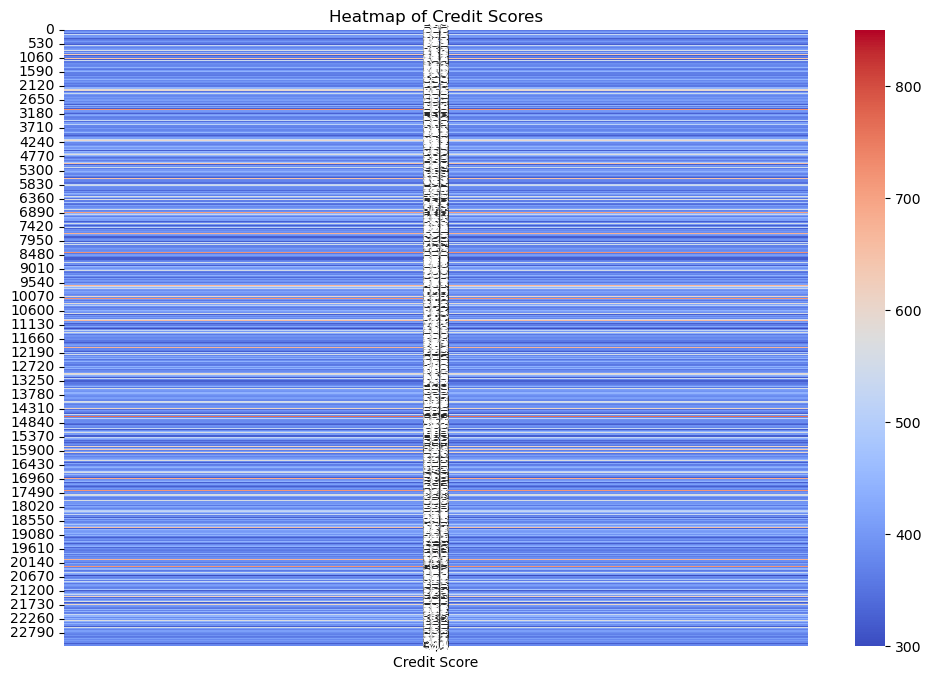

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the credit scores
df_scores = pd.DataFrame(credit_scores, columns=['Credit Score'])

# Create a heatmap of the credit scores
plt.figure(figsize=(12, 8))
sns.heatmap(df_scores, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Heatmap of Credit Scores')
plt.show()

In [ ]:
#test model function